In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [197]:
display(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [198]:
df.shape

(100000, 9)

In [199]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [201]:
df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

Text(0.5, 1.0, 'GENDER')

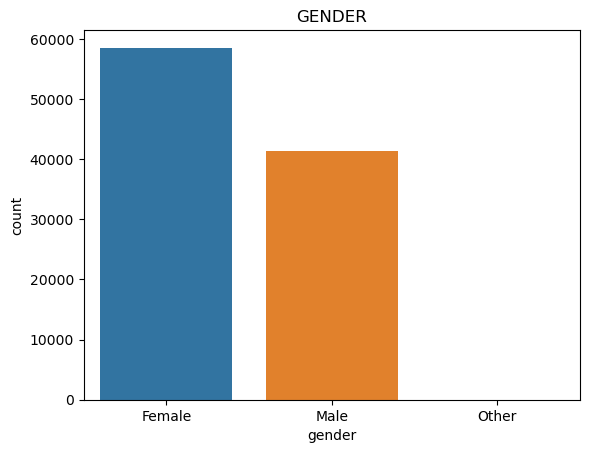

In [202]:
sns.countplot(x=df['gender'])
plt.title('GENDER')

In [203]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Text(0.5, 1.0, 'SMOKING')

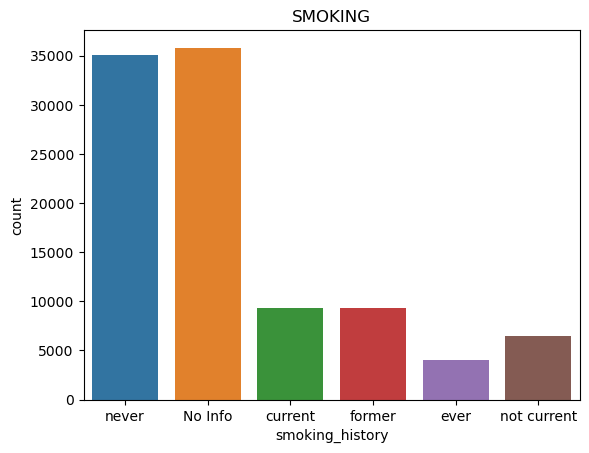

In [204]:
sns.countplot(x=df['smoking_history'])
plt.title("SMOKING")

In [205]:
from sklearn.preprocessing import OrdinalEncoder

In [206]:
enc=OrdinalEncoder()

In [207]:
a=['gender']
b=['smoking_history']

In [208]:
df[a]=enc.fit_transform(df[a])
df[b]=enc.fit_transform(df[b])

In [209]:
df=df.astype({'gender':'int','smoking_history':'int','age':'int'})

In [210]:
df.tail(9)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99991,1,22,0,0,1,29.65,6.0,80,0
99992,0,26,0,0,4,34.34,6.5,160,0
99993,0,40,0,0,4,40.69,3.5,155,0
99994,0,36,0,0,0,24.60,4.8,145,0
99995,0,80,0,0,0,27.32,6.2,90,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,4,35.42,4.0,100,0
99999,0,57,0,0,1,22.43,6.6,90,0


In [211]:
cor=df.corr()

In [212]:
cor.style.background_gradient(cmap='spring')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030721,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030721,1.000000,0.251093,0.233254,0.228865,0.337747,0.101328,0.110631,0.257933
hypertension,0.014203,0.251093,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233254,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228865,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337747,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101328,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110631,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.257933,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x=df.iloc[:,0:9]
y=df['diabetes']

In [216]:
ptr,pts,qtr,qts=train_test_split(x,y,test_size=0.2,random_state=0)

In [217]:
ptr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
10382,0,2,0,0,0,16.45,6.2,159,0
73171,0,55,0,0,4,24.59,6.0,130,0
30938,0,24,0,0,0,21.77,4.5,130,0
99310,1,30,0,0,4,27.32,6.2,159,0
58959,1,13,0,0,0,18.37,6.5,130,0
...,...,...,...,...,...,...,...,...,...
21243,1,12,0,0,4,23.68,5.8,130,0
45891,0,66,0,0,4,26.77,6.5,158,0
42613,1,66,0,0,4,41.23,9.0,145,1
43567,0,37,0,0,3,30.18,5.8,90,0


In [235]:
qtr

10382    0
73171    0
30938    0
99310    0
58959    0
        ..
21243    0
45891    0
42613    1
43567    0
68268    0
Name: diabetes, Length: 80000, dtype: int64

In [246]:
from sklearn.neighbors import KNeighborsClassifier

In [247]:
mod=KNeighborsClassifier()

In [248]:
mod.fit(ptr,qtr)

KNeighborsClassifier()

In [249]:
pred=mod.predict(pts)
print(pred)

C:\Users\Kumaran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0 0 0 ... 0 0 0]


In [250]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [251]:
acc=accuracy_score(qts,pred)
print("Accuracy is:",acc*100)
pre=precision_score(qts,pred)
print("Precision:",pre*100)
rec=recall_score(qts,pred)
print("Recall:",rec*100)
F1=f1_score(qts,pred)
print("F1 Score:",F1*100)

Accuracy is: 96.44
Precision: 95.00454132606721
Recall: 61.42102172636523
F1 Score: 74.6077032810271


In [252]:
from sklearn.metrics import confusion_matrix

In [253]:
c=confusion_matrix(qts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[18242    55]
 [  657  1046]]


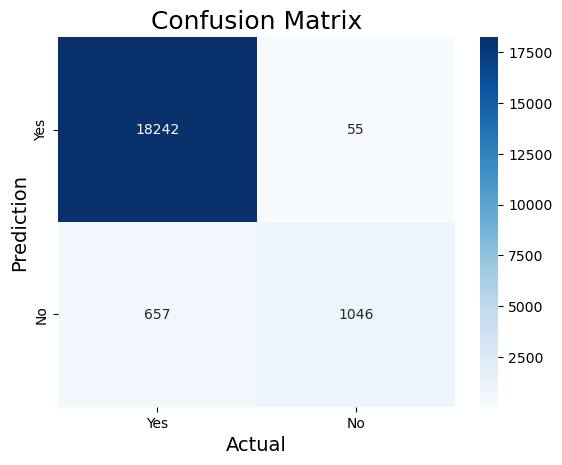

In [255]:
sns.heatmap(c,annot=True,fmt='g',cmap='Blues',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Prediction',fontsize=14)
plt.title("Confusion Matrix",fontsize=18)
plt.show()